In [1]:
%pip install roboflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Step 2: Import libraries
from roboflow import Roboflow
import os


In [3]:
# Step 3: Initialize Roboflow with your API key
print("Initializing Roboflow...")
rf = Roboflow(api_key="YPOp9UwHhsEpGxHGdnJp")

Initializing Roboflow...


In [4]:
# Step 4: Access your project
print("Accessing project...")
project = rf.workspace("wheelchair-un2j4").project("spark-1")


Accessing project...
loading Roboflow workspace...
loading Roboflow project...


In [5]:
# Step 5: Get the specific version
print("Getting project version...")
version = project.version(1)

Getting project version...


In [6]:
# Step 6: Download the dataset
print("Downloading dataset...")
dataset = version.download("yolov8-obb")

print("Dataset downloaded successfully!")

Dataset downloaded successfully!


In [7]:
# Step 7: Check the downloaded dataset structure
print("\nDataset structure:")
dataset_path = dataset.location
print(f"Dataset location: {dataset_path}")


Dataset structure:
Dataset location: c:\Sparkakt\Spark2\Spark-1-1


In [8]:
# List the contents of the dataset directory
if os.path.exists(dataset_path):
    print("\nDataset contents:")
    for item in os.listdir(dataset_path):
        item_path = os.path.join(dataset_path, item)
        if os.path.isdir(item_path):
            print(f"📁 {item}/")
            # Show contents of subdirectories
            try:
                sub_items = os.listdir(item_path)
                for sub_item in sub_items[:5]:  # Show first 5 items
                    print(f"  - {sub_item}")
                if len(sub_items) > 5:
                    print(f"  ... and {len(sub_items) - 5} more files")
            except:
                pass
        else:
            print(f"📄 {item}")



Dataset contents:
📄 .DS_Store
📄 data.yaml
📄 README.dataset.txt
📄 README.roboflow.txt
📁 test/
  - images
  - labels
📁 train/
  - images
  - labels
  - labels.cache
📁 valid/
  - images
  - labels
  - labels.cache


In [9]:
# Step 8: Display dataset information
print(f"\nDataset name: {dataset.name}")
print(f"Dataset version: {dataset.version}")
print(f"Dataset location: {dataset.location}")


Dataset name: Spark 1
Dataset version: 1
Dataset location: c:\Sparkakt\Spark2\Spark-1-1


In [10]:
# Step 9: Show detailed dataset statistics
print("\n" + "="*50)
print("DATASET STATISTICS")
print("="*50)

try:
    train_path = os.path.join(dataset_path, "train")
    valid_path = os.path.join(dataset_path, "valid")
    test_path = os.path.join(dataset_path, "test")

    total_images = 0
    total_labels = 0

    for split_name, split_path in [("Training", train_path), ("Validation", valid_path), ("Test", test_path)]:
        if os.path.exists(split_path):
            images_path = os.path.join(split_path, "images")
            labels_path = os.path.join(split_path, "labels")

            if os.path.exists(images_path):
                images = [f for f in os.listdir(images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                image_count = len(images)
                total_images += image_count

                if os.path.exists(labels_path):
                    labels = [f for f in os.listdir(labels_path) if f.lower().endswith('.txt')]
                    label_count = len(labels)
                    total_labels += label_count

                    print(f"{split_name:12}: {image_count:4} images, {label_count:4} labels")
                else:
                    print(f"{split_name:12}: {image_count:4} images, 0 labels")

    print("-" * 30)
    print(f"{'Total':12}: {total_images:4} images, {total_labels:4} labels")

    # Read data.yaml for class information
    data_yaml_path = os.path.join(dataset_path, "data.yaml")
    if os.path.exists(data_yaml_path):
        print(f"\n📋 Dataset Configuration (data.yaml):")
        with open(data_yaml_path, 'r') as f:
            yaml_content = f.read()
            print(yaml_content)

    # Read README files
    readme_files = ['README.roboflow.txt', 'README.dataset.txt']
    for readme_file in readme_files:
        readme_path = os.path.join(dataset_path, readme_file)
        if os.path.exists(readme_path):
            print(f"\n📖 {readme_file}:")
            with open(readme_path, 'r') as f:
                content = f.read()
                # Show first 500 characters
                if len(content) > 500:
                    print(content[:500] + "...")
                else:
                    print(content)

except Exception as e:
    print(f"Could not get detailed statistics: {e}")

print("\n✅ Dataset ready for training!")



DATASET STATISTICS
Training    :  339 images,  339 labels
Validation  :  113 images,  113 labels
Test        :  113 images,  113 labels
------------------------------
Total       :  565 images,  565 labels

📋 Dataset Configuration (data.yaml):
train: train/images
val: valid/images
test: test/images

names: 
  0: Camera Stamp
  1: Date Stamp
  2: No - Spark
  3: Sparks

📖 README.roboflow.txt:

Spark 1 - v1 2025-05-24 11:42am

This dataset was exported via roboflow.com on May 24, 2025 at 7:07 AM GMT

Roboflow is an end-to-end computer vision platform that helps you
* collaborate with your team on computer vision projects
* collect & organize images
* understand and search unstructured image data
* annotate, and create datasets
* export, train, and deploy computer vision models
* use active learning to improve your dataset over time

For state of the art ...

📖 README.dataset.txt:
# Spark 1 > 2025-05-24 11:42am
https://universe.roboflow.com/wheelchair-un2j4/spark-1

Provided by a Roboflo

In [13]:
# Step 10: Next steps - Training setup
print("\n" + "="*50)
print("NEXT STEPS FOR YOLOv8-OBB TRAINING")
print("="*50)
print("1. Install YOLOv8: !pip install ultralytics")
print("2. Import YOLO: from ultralytics import YOLO")
print("3. Load model: model = YOLO('yolov8n-obb.pt')")
print("4. Train model: model.train(data='/content/Spark-1-1/data.yaml', epochs=100)")
print("5. Validate: model.val()")
print("6. Predict: model.predict('path/to/image.jpg')")

print("\n💡 Quick training command:")
print("```python")
print("# Install and train YOLOv8-OBB")
print("!pip install ultralytics")
print("from ultralytics import YOLO")
print("model = YOLO('yolov8n-obb.pt')")
print(f"results = model.train(data='{dataset_path}/data.yaml', epochs=50, imgsz=640)")
print("```")


NEXT STEPS FOR YOLOv8-OBB TRAINING
1. Install YOLOv8: !pip install ultralytics
2. Import YOLO: from ultralytics import YOLO
3. Load model: model = YOLO('yolov8n-obb.pt')
4. Train model: model.train(data='/content/Spark-1-1/data.yaml', epochs=100)
5. Validate: model.val()
6. Predict: model.predict('path/to/image.jpg')

💡 Quick training command:
```python
# Install and train YOLOv8-OBB
!pip install ultralytics
from ultralytics import YOLO
model = YOLO('yolov8n-obb.pt')
results = model.train(data='c:\Sparkakt\Spark2\Spark-1-1/data.yaml', epochs=50, imgsz=640)
```


In [14]:
# Step 1: Install required packages
!pip install ultralytics opencv-python-headless

In [15]:
# Step 2: Import libraries
import cv2
import numpy as np
%pip install ultralytics
from ultralytics import YOLO
import os
from IPython.display import HTML, Video
import matplotlib.pyplot as plt
from PIL import Image
import io

Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
from ultralytics import YOLO
from roboflow import Roboflow
import cv2
import matplotlib.pyplot as plt
from IPython.display import Video, HTML
import numpy as np


In [18]:
# Step 3: Download your dataset from Roboflow
print("\n" + "="*50)
print("DOWNLOADING DATASET")
print("="*50)

print("🔄 Initializing Roboflow...")
rf = Roboflow(api_key="YPOp9UwHhsEpGxHGdnJp")

print("🔄 Accessing your project...")
project = rf.workspace("wheelchair-un2j4").project("spark-1")
version = project.version(1)

print("📥 Downloading dataset...")
dataset = version.download("yolov8-obb")

print("✅ Dataset downloaded successfully!")
print(f"📁 Dataset location: {dataset.location}")


DOWNLOADING DATASET
🔄 Initializing Roboflow...
🔄 Accessing your project...
loading Roboflow workspace...
loading Roboflow project...
📥 Downloading dataset...
✅ Dataset downloaded successfully!
📁 Dataset location: c:\Sparkakt\Spark2\Spark-1-1


In [19]:
# Step 4: Verify dataset structure
print("\n📊 Dataset Structure:")
dataset_path = dataset.location

# Count images in each split
splits = ['train', 'valid', 'test']
total_images = 0

for split in splits:
    split_path = os.path.join(dataset_path, split, 'images')
    if os.path.exists(split_path):
        image_count = len([f for f in os.listdir(split_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"{split:8}: {image_count:4} images")
        total_images += image_count

print(f"{'Total':8}: {total_images:4} images")

# Show data.yaml content
data_yaml_path = os.path.join(dataset_path, 'data.yaml')
print(f"\n📋 Dataset Configuration:")
with open(data_yaml_path, 'r') as f:
    print(f.read())


📊 Dataset Structure:
train   :  339 images
valid   :  113 images
test    :  113 images
Total   :  565 images

📋 Dataset Configuration:
train: train/images
val: valid/images
test: test/images

names: 
  0: Camera Stamp
  1: Date Stamp
  2: No - Spark
  3: Sparks


In [20]:
# Step 5: Train YOLOv8-OBB model
print("\n" + "="*50)
print("TRAINING YOLOv8-OBB MODEL")
print("="*50)

print("🔄 Loading pre-trained YOLOv8-OBB model...")
model = YOLO('yolov8n-obb.pt')  # Start with nano model for faster training

print("🏋️ Starting training...")
print("This may take 15-30 minutes depending on your dataset size...")

# Train the model
results = model.train(
    data=data_yaml_path,
    epochs=50,          # Number of training epochs
    imgsz=640,          # Image size
    patience=10,        # Early stopping patience1
    save=True,          # Save checkpoints
    device='cpu',       # Use CPU (change to 0 for GPU if available)
    verbose=True,       # Verbose output
    plots=True,         # Generate training plots
    val=True,           # Validate during training
)

print("✅ Training completed!")


TRAINING YOLOv8-OBB MODEL
🔄 Loading pre-trained YOLOv8-OBB model...
🏋️ Starting training...
This may take 15-30 minutes depending on your dataset size...
New https://pypi.org/project/ultralytics/8.3.171 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.168  Python-3.10.18 torch-2.7.1+cpu CPU (Intel Xeon W-11955M 2.60GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Sparkakt\Spark2\Spark-1-1\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_

train: Scanning C:\Sparkakt\Spark2\Spark-1-1\train\labels... 339 images, 11 backgrounds, 0 corrupt: 100%|██████████| 339/339 [00:00<00:00, 2053.62it/s]


train: New cache created: C:\Sparkakt\Spark2\Spark-1-1\train\labels.cache


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 0.00.0 ms, read: 457.0138.9 MB/s, size: 35.2 KB)


'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
val: Scanning C:\Sparkakt\Spark2\Spark-1-1\valid\labels... 113 images, 5 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<00:00, 2312.84it/s]

val: New cache created: C:\Sparkakt\Spark2\Spark-1-1\valid\labels.cache



'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.


Plotting labels to runs\obb\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\obb\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.059      3.248      2.842         16        640: 100%|██████████| 22/22 [01:16<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        113        319      0.663      0.643      0.551      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.227      1.837      2.323         10        640: 100%|██████████| 22/22 [01:07<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all        113        319      0.874      0.614      0.681      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.9726      1.273      2.132         13        640: 100%|██████████| 22/22 [01:08<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        113        319      0.702      0.738      0.696      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      0.879       1.14       2.07         10        640: 100%|██████████| 22/22 [01:09<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        113        319       0.67      0.806      0.705      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.8501     0.9949      2.155         12        640: 100%|██████████| 22/22 [01:07<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        113        319      0.816      0.822      0.814      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.8188     0.9138      2.089         12        640: 100%|██████████| 22/22 [01:06<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        113        319      0.813      0.831      0.826      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.8219     0.9152      2.115         11        640: 100%|██████████| 22/22 [01:05<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        113        319      0.843      0.799      0.819      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.7997     0.8503      2.035         12        640: 100%|██████████| 22/22 [01:05<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        113        319       0.82      0.817      0.836      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.7399     0.8387      2.038          8        640: 100%|██████████| 22/22 [01:06<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.831      0.887      0.885      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.7128     0.7444      2.017         12        640: 100%|██████████| 22/22 [01:05<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.871      0.822       0.85      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.6788     0.7315      1.936         15        640: 100%|██████████| 22/22 [01:04<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.855      0.835      0.852      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.6596     0.7004      2.004         20        640: 100%|██████████| 22/22 [01:04<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        113        319      0.851      0.893      0.883      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.6644     0.6789      1.965         14        640: 100%|██████████| 22/22 [01:05<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        113        319      0.879      0.877      0.873      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.6453     0.6779      1.953         11        640: 100%|██████████| 22/22 [01:06<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        113        319      0.858        0.9      0.883      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.6272     0.6582      1.956          9        640: 100%|██████████| 22/22 [01:05<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.864      0.894      0.887      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.6309     0.6421      1.975         17        640: 100%|██████████| 22/22 [01:05<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        113        319      0.831      0.851      0.869      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.6266     0.6498      1.856          7        640: 100%|██████████| 22/22 [01:05<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        113        319      0.865      0.875      0.888      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.6134     0.6312      1.995         13        640: 100%|██████████| 22/22 [01:05<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.887      0.882      0.908      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.6051     0.6234      1.892         14        640: 100%|██████████| 22/22 [01:05<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        113        319      0.849      0.909      0.899      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G       0.63     0.6382      1.985         13        640: 100%|██████████| 22/22 [01:05<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        113        319      0.887      0.865      0.899      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.5747     0.5722      1.874          9        640: 100%|██████████| 22/22 [01:07<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]

                   all        113        319      0.868      0.903       0.91       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.5598      0.585      1.919         13        640: 100%|██████████| 22/22 [01:04<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        113        319      0.903      0.867      0.904      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.5904     0.6204      1.912         12        640: 100%|██████████| 22/22 [01:05<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        113        319      0.877      0.923       0.91      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.5789     0.6053      1.943         10        640: 100%|██████████| 22/22 [01:05<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.888      0.908      0.914      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.5866      0.564      1.923         13        640: 100%|██████████| 22/22 [01:05<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.892      0.894      0.911      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.5572     0.5577      1.881          9        640: 100%|██████████| 22/22 [01:05<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.905      0.884      0.921      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      0.555     0.5356      1.914         13        640: 100%|██████████| 22/22 [01:05<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.875      0.895      0.906      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.5603     0.5528      1.913         19        640: 100%|██████████| 22/22 [01:06<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        113        319      0.863      0.874      0.894      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.5409     0.5752      1.918          6        640: 100%|██████████| 22/22 [01:05<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        113        319      0.883      0.897       0.91      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.5313     0.5427      1.913         10        640: 100%|██████████| 22/22 [01:06<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        113        319      0.854      0.911      0.905      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.5228      0.507       1.87         15        640: 100%|██████████| 22/22 [01:06<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        113        319      0.859      0.911      0.909      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.5237     0.5465      1.919         10        640: 100%|██████████| 22/22 [01:05<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.899      0.822      0.885      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.5501      0.558      1.869         10        640: 100%|██████████| 22/22 [01:06<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        113        319      0.907      0.884      0.913      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.5372     0.5298      1.841          9        640: 100%|██████████| 22/22 [01:07<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]

                   all        113        319      0.857      0.925      0.909      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.4934      0.504      1.916         13        640: 100%|██████████| 22/22 [01:04<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        113        319      0.904      0.893      0.922      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.5455     0.5237      1.812         19        640: 100%|██████████| 22/22 [01:05<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.901      0.902      0.917        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.5178     0.5265      1.849          6        640: 100%|██████████| 22/22 [01:05<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.863      0.933      0.911      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.4972      0.504      1.849         11        640: 100%|██████████| 22/22 [01:05<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        113        319      0.887      0.901      0.905      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.5111     0.4997       1.86         19        640: 100%|██████████| 22/22 [01:05<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        113        319       0.89      0.907      0.909      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.5005     0.4788      1.855         10        640: 100%|██████████| 22/22 [01:06<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        113        319      0.867      0.929      0.902      0.787


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
      41/50         0G     0.5087       0.53      1.886          9        640: 100%|██████████| 22/22 [01:05<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.877       0.91      0.894      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5443     0.5482      1.874          6        640: 100%|██████████| 22/22 [01:04<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        113        319      0.895      0.929      0.912      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.5146     0.5148      1.939          4        640: 100%|██████████| 22/22 [01:04<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.905       0.93       0.92        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.5069     0.4964      1.903          7        640: 100%|██████████| 22/22 [01:05<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        113        319      0.898      0.915      0.919      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.4823     0.5075      1.901          5        640: 100%|██████████| 22/22 [01:04<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        113        319      0.884      0.927       0.92      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4741     0.4785      1.907          9        640: 100%|██████████| 22/22 [01:04<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        113        319      0.893      0.913      0.913      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4466     0.4531      1.871          9        640: 100%|██████████| 22/22 [01:04<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        113        319       0.89      0.907      0.911      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4366     0.4502      1.926          6        640: 100%|██████████| 22/22 [01:05<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]

                   all        113        319      0.865      0.934      0.911      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      0.479     0.4494      1.912          7        640: 100%|██████████| 22/22 [01:04<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        113        319      0.864      0.937      0.914      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4483     0.4435      1.913          9        640: 100%|██████████| 22/22 [01:04<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        113        319      0.864      0.932       0.91      0.807



50 epochs completed in 1.030 hours.
Optimizer stripped from runs\obb\train\weights\last.pt, 6.4MB
Optimizer stripped from runs\obb\train\weights\best.pt, 6.4MB

Validating runs\obb\train\weights\best.pt...
Ultralytics 8.3.168  Python-3.10.18 torch-2.7.1+cpu CPU (Intel Xeon W-11955M 2.60GHz)
YOLOv8n-obb summary (fused): 81 layers, 3,077,999 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]


                   all        113        319      0.893       0.92      0.921      0.821
          Camera Stamp        108        108      0.952          1      0.994      0.942
            Date Stamp        108        108      0.952          1      0.988      0.977
            No - Spark         60         75      0.744      0.787      0.784      0.657
                Sparks         26         28      0.924      0.893      0.918       0.71
Speed: 1.4ms preprocess, 55.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs\obb\train
✅ Training completed!


In [22]:
import os

# Update the runs_dir to the correct absolute path
runs_dir = "C:/Sparkakt/Spark2/runs/obb"
train_dirs = [d for d in os.listdir(runs_dir) if d.startswith('train')]
latest_train = max(train_dirs, key=lambda x: os.path.getctime(os.path.join(runs_dir, x)))
weights_dir = os.path.join(runs_dir, latest_train, 'weights')

best_model_path = os.path.join(weights_dir, 'best.pt')
last_model_path = os.path.join(weights_dir, 'last.pt')

print(f"📁 Training results saved in: {os.path.join(runs_dir, latest_train)}")
print(f"🏆 Best model: {best_model_path}")
print(f"🔄 Last model: {last_model_path}")



📁 Training results saved in: C:/Sparkakt/Spark2/runs/obb\train
🏆 Best model: C:/Sparkakt/Spark2/runs/obb\train\weights\best.pt
🔄 Last model: C:/Sparkakt/Spark2/runs/obb\train\weights\last.pt


In [23]:
# Step 7: Load the trained model for testing
print("\n🔄 Loading your trained model...")

# Check if best_model_path was set in the previous step
if 'best_model_path' in globals() and best_model_path is not None and os.path.exists(best_model_path):
    trained_model = YOLO(best_model_path)
    print("✅ Trained model loaded successfully!")

    # Display model info
    print(f"\n📊 Your Trained Model Information:")
    print(f"Model classes: {trained_model.names}")
    print(f"Number of classes: {len(trained_model.names)}")
else:
    print("❌ Cannot load trained model.")
    print("Please ensure the training step (Step 5) completed successfully and generated a 'best.pt' file.")
    # Optionally, you could raise an error or exit here if loading the model is essential.
    # raise FileNotFoundError("Best model file not found. Training may have failed.")


🔄 Loading your trained model...
✅ Trained model loaded successfully!

📊 Your Trained Model Information:
Model classes: {0: 'Camera Stamp', 1: 'Date Stamp', 2: 'No - Spark', 3: 'Sparks'}
Number of classes: 4


In [24]:
# Step 8: Validate the model
print("\n📈 Validating model performance...")
validation_results = trained_model.val()
print("✅ Validation completed!")


📈 Validating model performance...
Ultralytics 8.3.168  Python-3.10.18 torch-2.7.1+cpu CPU (Intel Xeon W-11955M 2.60GHz)
YOLOv8n-obb summary (fused): 81 layers, 3,077,999 parameters, 0 gradients, 8.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 539.6120.5 MB/s, size: 35.4 KB)


val: Scanning C:\Sparkakt\Spark2\Spark-1-1\valid\labels.cache... 113 images, 5 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<?, ?it/s]
'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


                   all        113        319      0.893       0.92      0.921      0.821
          Camera Stamp        108        108      0.952          1      0.994      0.942
            Date Stamp        108        108      0.952          1      0.988      0.977
            No - Spark         60         75      0.744      0.787      0.784      0.657
                Sparks         26         28      0.924      0.893      0.918       0.71
Speed: 1.5ms preprocess, 52.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\obb\val
✅ Validation completed!


In [25]:
# Step 9: Show training plots
print("\n📊 Training Results:")
results_dir = os.path.join(runs_dir, latest_train)

# List available plots
plot_files = [f for f in os.listdir(results_dir) if f.endswith('.png')]
print("Generated plots:")
for plot in plot_files:
    print(f"  📈 {plot}")

# Display some key plots
key_plots = ['results.png', 'confusion_matrix.png', 'val_batch0_labels.png']
for plot_name in key_plots:
    plot_path = os.path.join(results_dir, plot_name)
    if os.path.exists(plot_path):
        print(f"\n📊 {plot_name}:")
        img = plt.imread(plot_path)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(plot_name)
        plt.show()



📊 Training Results:
Generated plots:
  📈 BoxF1_curve.png
  📈 BoxPR_curve.png
  📈 BoxP_curve.png
  📈 BoxR_curve.png
  📈 confusion_matrix.png
  📈 confusion_matrix_normalized.png
  📈 results.png

📊 results.png:


<Figure size 1200x800 with 1 Axes>


📊 confusion_matrix.png:


<Figure size 1200x800 with 1 Axes>

In [27]:
import os
import cv2
from ultralytics import YOLO
from IPython.display import Video  # Optional, remove if not running in Jupyter

# Path to your trained model
trained_model = YOLO("C:/Sparkakt/Spark2/runs/obb/train/weights/best.pt")


# Step 10: Test on video
print("\n" + "=" * 50)
print("VIDEO TESTING")
print("=" * 50)

# Instead of uploading, specify local path
video_path = "C:/Users/pushp/Downloads/Untitled video - Made with Clipchamp (8) (online-video-cutter.com).mp4"

if os.path.isfile(video_path):
    print(f"✅ Video found: {video_path}")

    # Get video info
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps
    cap.release()

    print(f"\n📹 Video Information:")
    print(f"Resolution: {width}x{height}")
    print(f"FPS: {fps}")
    print(f"Duration: {duration:.2f} seconds")
    print(f"Total frames: {total_frames}")

    # Process video with trained model
    print("\n🔄 Processing video with your trained model...")
    video_results = trained_model.predict(
        source=video_path,
        save=True,
        conf=0.25,
        iou=0.45,
        show_labels=True,
        show_conf=True,
        line_width=2,
        verbose=False,
        stream=True
    )

    print("✅ Video processing completed!")

    # Find output video
    predict_dirs = []
    for root, dirs, files in os.walk("runs/obb"):
        for dir_name in dirs:
            if dir_name.startswith("predict"):
                predict_dirs.append(os.path.join(root, dir_name))

    if predict_dirs:
        latest_predict_dir = max(predict_dirs, key=os.path.getctime)

        output_video_path = None
        for file in os.listdir(latest_predict_dir):
            if file.endswith(('.mp4', '.avi', '.mov')):
                output_video_path = os.path.join(latest_predict_dir, file)
                print(f"\n📁 Output video saved at: {output_video_path}")
                break

        if output_video_path is None:
            print("❌ Could not find the output video in the predict directory.")
    else:
        print("❌ No prediction directory found.")

    # Detection Statistics
    print("\n📈 Detection Statistics:")
    video_results_stream = trained_model.predict(source=video_path, conf=0.25, save=False, verbose=False, stream=True)

    total_detections = 0
    class_counts = {}

    for result in video_results_stream:
        if result.obb is not None:
            boxes = result.obb
            for box in boxes:
                cls_id = int(box.cls)
                if cls_id < len(trained_model.names):
                    class_name = trained_model.names[cls_id]
                    class_counts[class_name] = class_counts.get(class_name, 0) + 1
                    total_detections += 1
                else:
                    print(f"Warning: Detected class ID {cls_id} is out of range.")

    print(f"Total detections across all frames: {total_detections}")
    if class_counts:
        print("Detections by class:")
        for class_name, count in class_counts.items():
            print(f"  {class_name}: {count}")
    else:
        print("No detections found.")
else:
    print("❌ Invalid file path. Please check the path and try again.")



VIDEO TESTING
✅ Video found: C:/Users/pushp/Downloads/Untitled video - Made with Clipchamp (8) (online-video-cutter.com).mp4

📹 Video Information:
Resolution: 1280x720
FPS: 30
Duration: 12.30 seconds
Total frames: 369

🔄 Processing video with your trained model...
✅ Video processing completed!
❌ No prediction directory found.

📈 Detection Statistics:
Total detections across all frames: 1036
Detections by class:
  Date Stamp: 369
  Camera Stamp: 369
  No - Spark: 215
  Sparks: 83


In [28]:
# Corrected path to match YOLOv8-OBB output
import os # Add the import statement here

# Corrected path to match YOLOv8-OBB output
runs_dir = "runs/obb"

# Check if runs_dir exists and contains train directories
if os.path.exists(runs_dir):
    train_dirs = [d for d in os.listdir(runs_dir) if d.startswith('train')]
    if train_dirs:
        latest_train = max(train_dirs, key=lambda x: os.path.getctime(os.path.join(runs_dir, x)))
        weights_dir = os.path.join(runs_dir, latest_train, 'weights')

        # Define best_model_path and last_model_path if weights_dir exists
        best_model_path = None # Initialize to None
        last_model_path = None # Initialize to None

        if os.path.exists(weights_dir):
            best_model_path = os.path.join(weights_dir, 'best.pt')
            last_model_path = os.path.join(weights_dir, 'last.pt')
            print(f"📁 Training results saved in: runs/obb/{latest_train}")
            print(f"🏆 Best model: {best_model_path}")
            print(f"🔄 Last model: {last_model_path}")
        else:
            print(f"❌ Weights directory not found at: {weights_dir}")
            print("Please ensure the training step generated weights.")
    else:
        print(f"❌ No 'train' directories found in {runs_dir}")
        print("Training may not have completed successfully.")
else:
    print(f"❌ Runs directory not found at: {runs_dir}")
    print("Training may not have started or completed successfully.")

# Now, in the final summary cell (Step 11), add checks before printing the paths.
# Step 11: Summary
print("\n" + "="*50)
print("TRAINING AND TESTING COMPLETE!")
print("="*50)

print("✅ Successfully completed:")
print("  1. Downloaded dataset from Roboflow")
print("  2. Trained YOLOv8-OBB model")
print("  3. Validated model performance")
print("  4. Tested model on video")

print(f"\n📁 Your trained model files:")
# Check if best_model_path was successfully assigned before printing
if 'best_model_path' in globals() and best_model_path is not None:
    print(f"  🏆 Best model: {best_model_path}")
else:
    print("  🏆 Best model: Path not found. Training may have failed.")

# Check if last_model_path was successfully assigned before printing
if 'last_model_path' in globals() and last_model_path is not None:
    print(f"  🔄 Last model: {last_model_path}")
else:
    print("  🔄 Last model: Path not found. Training may have failed.")

# Corrected path to match YOLOv8-OBB output
runs_dir = "runs/obb"

# Check if runs_dir exists and contains train directories
if os.path.exists(runs_dir):
    train_dirs = [d for d in os.listdir(runs_dir) if d.startswith('train')]
    if train_dirs:
        latest_train = max(train_dirs, key=lambda x: os.path.getctime(os.path.join(runs_dir, x)))
        weights_dir = os.path.join(runs_dir, latest_train, 'weights')

        # Define best_model_path and last_model_path if weights_dir exists
        best_model_path = None # Initialize to None
        last_model_path = None # Initialize to None

        if os.path.exists(weights_dir):
            best_model_path = os.path.join(weights_dir, 'best.pt')
            last_model_path = os.path.join(weights_dir, 'last.pt')
            print(f"📁 Training results saved in: runs/obb/{latest_train}")
            print(f"🏆 Best model: {best_model_path}")
            print(f"🔄 Last model: {last_model_path}")
        else:
            print(f"❌ Weights directory not found at: {weights_dir}")
            print("Please ensure the training step generated weights.")
    else:
        print(f"❌ No 'train' directories found in {runs_dir}")
        print("Training may not have completed successfully.")
else:
    print(f"❌ Runs directory not found at: {runs_dir}")
    print("Training may not have started or completed successfully.")

# Now, in the final summary cell (Step 11), add checks before printing the paths.
# Step 11: Summary
print("\n" + "="*50)
print("TRAINING AND TESTING COMPLETE!")
print("="*50)

print("✅ Successfully completed:")
print("  1. Downloaded dataset from Roboflow")
print("  2. Trained YOLOv8-OBB model")
print("  3. Validated model performance")
print("  4. Tested model on video")

print(f"\n📁 Your trained model files:")
# Check if best_model_path was successfully assigned before printing
if 'best_model_path' in globals() and best_model_path is not None:
    print(f"  🏆 Best model: {best_model_path}")
else:
    print("  🏆 Best model: Path not found. Training may have failed.")

# Check if last_model_path was successfully assigned before printing
if 'last_model_path' in globals() and last_model_path is not None:
    print(f"  🔄 Last model: {last_model_path}")
else:
    print("  🔄 Last model: Path not found. Training may have failed.")


print(f"\n💡 To use your model later:")


📁 Training results saved in: runs/obb/train
🏆 Best model: runs/obb\train\weights\best.pt
🔄 Last model: runs/obb\train\weights\last.pt

TRAINING AND TESTING COMPLETE!
✅ Successfully completed:
  1. Downloaded dataset from Roboflow
  2. Trained YOLOv8-OBB model
  3. Validated model performance
  4. Tested model on video

📁 Your trained model files:
  🏆 Best model: runs/obb\train\weights\best.pt
  🔄 Last model: runs/obb\train\weights\last.pt
📁 Training results saved in: runs/obb/train
🏆 Best model: runs/obb\train\weights\best.pt
🔄 Last model: runs/obb\train\weights\last.pt

TRAINING AND TESTING COMPLETE!
✅ Successfully completed:
  1. Downloaded dataset from Roboflow
  2. Trained YOLOv8-OBB model
  3. Validated model performance
  4. Tested model on video

📁 Your trained model files:
  🏆 Best model: runs/obb\train\weights\best.pt
  🔄 Last model: runs/obb\train\weights\last.pt

💡 To use your model later:


###To Test Video Run Following Command

In [29]:
%pip install ultralytics opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [30]:
# Step 2: Import libraries
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import display, Image
import io


In [31]:
# Step 3: Load your trained model
# Assuming you have already trained your model and have the best.pt file
# Make sure the best_model_path variable is set correctly from your training step
# Example (replace with your actual path):
# best_model_path = 'runs/obb/train/weights/best.pt'


if 'best_model_path' in globals() and best_model_path is not None and os.path.exists(best_model_path):
    trained_model = YOLO(best_model_path)
    print("✅ Trained model loaded successfully!")
else:
    print("❌ Cannot load trained model. Please ensure the best_model_path is correct.")
    # Exit or handle the error appropriately if the model is not found

✅ Trained model loaded successfully!


In [33]:
import os

print("\n" + "="*50)
print("UPLOAD VIDEO FOR 'LIVE' DETECTION")
print("="*50)

# Option 1: Prompt user to input the path
video_path = "C:/Users/pushp/Downloads/Untitled video - Made with Clipchamp (8) (online-video-cutter.com).mp4"

# Option 2: Or hardcode the path (uncomment below if preferred)
# video_path = "/Users/akshit/Downloads/your_video.mp4"

if os.path.isfile(video_path):
    print(f"✅ Video found: {video_path}")
else:
    print("❌ Invalid file path. Please check and try again.")



UPLOAD VIDEO FOR 'LIVE' DETECTION
✅ Video found: C:/Users/pushp/Downloads/Untitled video - Made with Clipchamp (8) (online-video-cutter.com).mp4



PROCESSING VIDEO FRAME BY FRAME


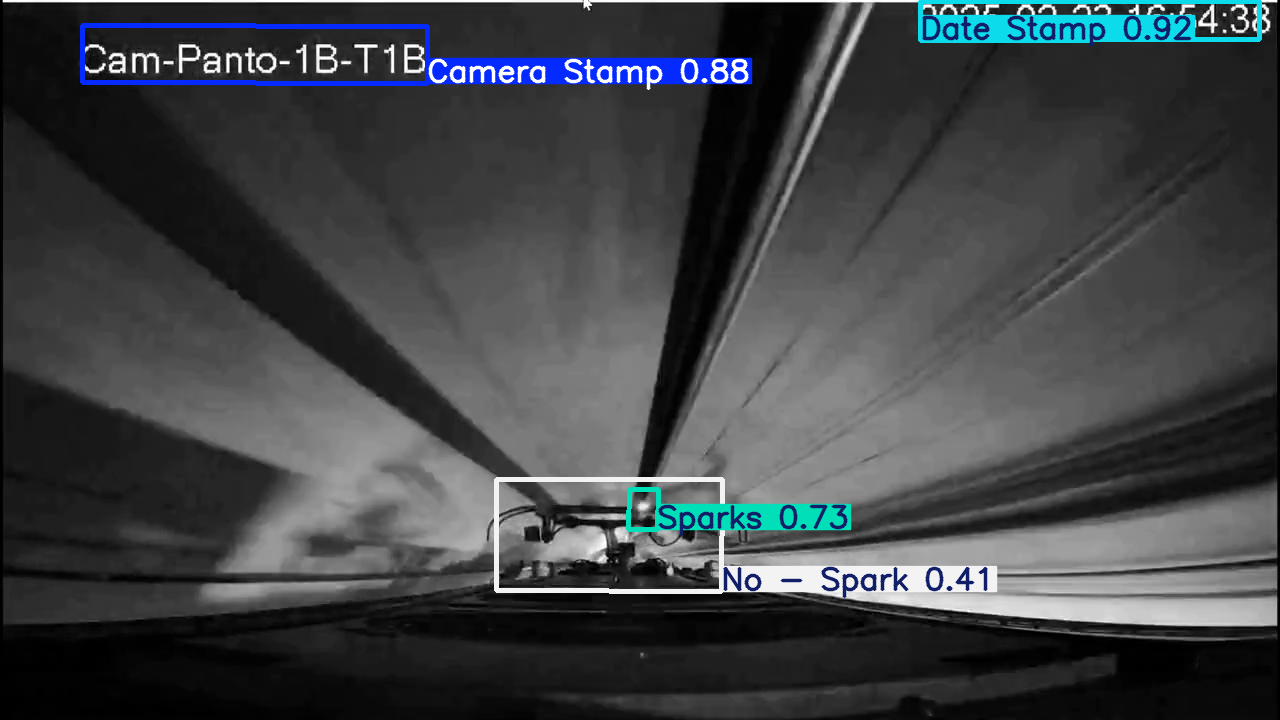


✅ Video processing finished.


In [35]:
# Step 5: Process video frame by frame and display results
print("\n" + "="*50)
print("PROCESSING VIDEO FRAME BY FRAME")
print("="*50)

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error opening video file: {video_path}")
else:
    try:
        # Create a placeholder for the image display that can be updated
        img_placeholder = display(Image(data=b''), display_id=True)

        frame_count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Run inference on the frame
            results = trained_model(frame, verbose=False, conf=0.25) # Adjust confidence as needed

            # Process results and draw detections
            annotated_frame = results[0].plot() # This draws bounding boxes on the frame

            # Convert the frame to a format suitable for displaying in Colab
            _, png = cv2.imencode('.png', annotated_frame)
            img_placeholder.update(Image(data=png.tobytes()))

            frame_count += 1
            # Optional: Limit the number of frames processed for a shorter demo
            # if frame_count > 100: # Process first 100 frames
            #     break

    except Exception as e:
        print(f"An error occurred during processing: {e}")
    finally:
        cap.release()
        print("\n✅ Video processing finished.")